<a href="https://colab.research.google.com/github/apurbaanik/ML_Final_Project_NBA/blob/main/ML_Final_Project_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Final Project - NBA Champion Prediction Based on Regular Season Stats

---


- Team: Anik Barua, Kashyapa Jayasekera
- CS-UY 4563 B
- Date: 11-24-2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## Part 1: Loading the dataset

In [2]:
data = 'https://raw.githubusercontent.com/apurbaanik/ML_Final_Project_NBA/main/NBA_Team_Stats.csv'
df = pd.read_csv(data)
df.head(10)

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,FGPct,3PPct,FTPct,Eff,Deff,Year,Won
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,0.449,0.323,0.741,111.6,17.5,1997-1998,Yes
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,24.3,29.5,11.3,0.483,0.368,0.768,116.3,17.5,1997-1998,No
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,21.7,29.8,12.1,0.466,0.355,0.747,117.1,13.6,1997-1998,No
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,22.9,29.7,13.2,0.480,0.350,0.675,120.8,13.2,1997-1998,No
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,21.2,32.2,11.9,0.468,0.344,0.688,108.0,13.1,1997-1998,No
5,6,Indiana,98,48.4,95.3,38.6,22.4,7.8,4.5,13.6,23.0,28.2,10.4,0.468,0.387,0.763,109.0,12.2,1997-1998,No
6,7,Miami,87,48.2,94.5,41.7,21.1,8.0,5.2,14.2,24.2,29.4,12.3,0.449,0.355,0.735,107.4,10.0,1997-1998,No
7,8,Seattle,92,48.2,100.0,38.5,24.0,9.7,4.5,13.4,22.3,27.0,11.5,0.471,0.390,0.724,114.5,9.4,1997-1998,No
8,9,Atlanta,86,48.5,95.5,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,0.454,0.335,0.753,108.1,7.3,1997-1998,No
9,10,New York,92,48.4,91.3,41.4,21.5,7.8,3.2,14.7,24.1,29.6,11.8,0.446,0.341,0.771,102.3,7.2,1997-1998,No


## Part 2: Preprocessing Step

1. Dropping columns: "No", "Team", "Year"
2. Using `preprocessing` to scale the data
3. Implementing One Hot Encoding for "Won" column

In [3]:
df = df.drop(columns=['No', 'Team', 'Year'])

#### Converting df to data(<np.ndarray>)

In [4]:
xnames = ['G','Min','Pts','Reb','Ast','Stl','Blk','To','Pf','Dreb','Oreb','FGPct','3PPct','FTPct','Eff','Deff']
X = np.array(df[xnames]) # X now contains all the features
y = np.array(df[['Won']]) # X now contains all the labels

#### One Hot Encoding


In [5]:
one_hot_encoding = OneHotEncoder()
y_transformed = one_hot_encoding.fit_transform(y)
y = (y_transformed.toarray())[:,1].reshape(X.shape[0],1)

#### Training and Validation Set
Splitting the data in 75% training and 25% test data. 

In [6]:
# Preprocessing 
X_scale = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, train_size=0.75, random_state=42)
y_2d_train = y_train.reshape(y_train.size,1)
y_2d_test = y_test.reshape(y_test.size,1)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print('X_train.shape: ', X_train.shape)
print('y_2d_train.shape: ', y_2d_train.shape)

X_train.shape:  (543, 16)
y_2d_train.shape:  (543, 1)


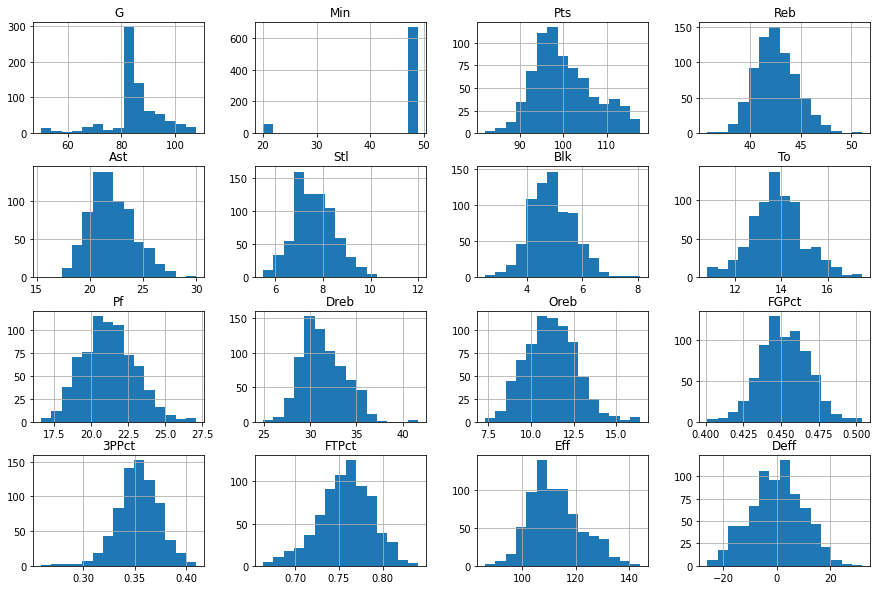

In [53]:
df.hist(bins = 15, figsize=(15, 10))
plt.show()

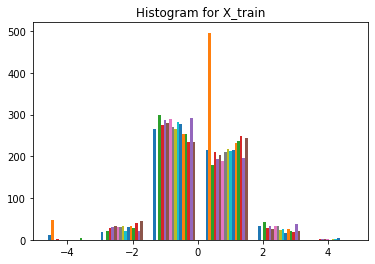

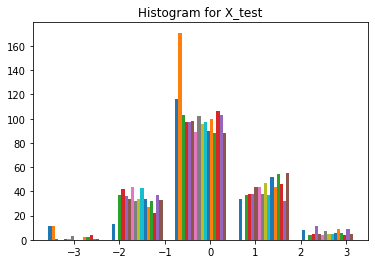

In [52]:
#df.hist(bins = 15, figsize=(15, 10))
plt.hist(X_train, bins=6, range=None, weights=None, density=None)
plt.title("Histogram for X_train")
plt.show()
plt.hist(X_test, bins =5) 
plt.title("Histogram for X_test")
plt.show()

# Part 2: Models

## Logistic Regression

**logistic regresssion with $L2$ regularization**

In [ ]:
# Create object of logistic regression model.
logreg = LogisticRegression(C=100000000, penalty='l2', max_iter=100000)
logreg.fit(X_train, y_train.reshape(y_train.shape[0]))
y_hat_logreg = logreg.predict(X_test)
acc_logreg = logreg.score(X_test, y_test)

print("Accuracy on training data = %.10f" % acc_logreg)

Accuracy on training data = 0.9395604396


In [ ]:
intercept_logreg = logreg.intercept_
print('intercept_logreg: ', intercept_logreg)

w_logreg = logreg.coef_
data = {'feature': xnames, 'slope': np.squeeze(w_logreg)}
dfslope = pd.DataFrame(data=data)
dfslope

intercept_logreg:  [-11.93591382]


,feature,slope
0,G,1.517982
1,Min,0.189517
2,Pts,7.814770
3,Reb,22.716968
4,Ast,1.205878
5,Stl,0.646503
6,Blk,-0.196428
7,To,-0.634610
8,Pf,-1.023742
9,Dreb,-24.704170


In [ ]:
# For the test data - number of tpr, fpr, fnr, and tnr in the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_hat_logreg, y_test)

array([[169,   5],
       [  6,   2]])

In [ ]:
from numpy.lib.function_base import average
from sklearn.metrics import precision_recall_fscore_support

# Find Precision, recall and fscore using precision_recall_fscore_support method of sklearn
support_Vec = precision_recall_fscore_support(y_test, y_hat_logreg, average = None)
prec = support_Vec[0]
recal = support_Vec[1]
fscore = support_Vec[2]

print('prec: ', prec[0])
print('recal: ', recal[0])
print('fscore: ', fscore[0])

prec:  0.9712643678160919
recal:  0.9657142857142857
fscore:  0.9684813753581661


**logistic regresssion with 𝐿1 regularization**

In [ ]:
# Create object of logistic regression model.
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train.reshape(y_train.shape[0]))
y_hat_logreg = logreg.predict(X_test)
acc_logreg = logreg.score(X_test, y_test)

print("Accuracy on training data = %.10f" % acc_logreg)

Accuracy on training data = 0.9670329670


In [ ]:
intercept_logreg = logreg.intercept_
print('intercept_logreg: ', intercept_logreg)
w_logreg = logreg.coef_
data = {'feature': xnames, 'slope': np.squeeze(w_logreg)}
dfslope = pd.DataFrame(data=data)
dfslope

intercept_logreg:  [-6.34942114]


,feature,slope
0,G,1.052617
1,Min,0.000000
2,Pts,0.000000
3,Reb,-0.048858
4,Ast,-0.192244
5,Stl,0.040212
6,Blk,-0.078747
7,To,-0.065966
8,Pf,-0.210102
9,Dreb,-0.014718


In [ ]:
from numpy.lib.function_base import average
from sklearn.metrics import precision_recall_fscore_support

# Find Precision, recall and fscore using precision_recall_fscore_support method of sklearn
support_Vec = precision_recall_fscore_support(y_test, y_hat_logreg, average = None)
prec = support_Vec[0]
recal = support_Vec[1]
fscore = support_Vec[2]

print('prec: ', prec[0])
print('recal: ', recal[0])
print('fscore: ', fscore[0])

prec:  0.9668508287292817
recal:  1.0
fscore:  0.9831460674157304


**logistic regresssion with no regularization**

In [ ]:
# Create object of logistic regression model.
logreg = LogisticRegression(penalty='none', max_iter=100000)
logreg.fit(X_train, y_train.reshape(y_train.shape[0]))
y_hat_logreg = logreg.predict(X_test)
acc_logreg = logreg.score(X_test, y_test)

print("Accuracy on training data = %.10f" % acc_logreg)

Accuracy on training data = 0.9395604396


In [ ]:
intercept_logreg = logreg.intercept_
print('intercept_logreg: ', intercept_logreg)
w_logreg = logreg.coef_
data = {'feature': xnames, 'slope': np.squeeze(w_logreg)}
dfslope = pd.DataFrame(data=data)
dfslope

intercept_logreg:  [-11.93632599]


,feature,slope
0,G,1.518045
1,Min,0.189660
2,Pts,7.825029
3,Reb,22.717086
4,Ast,1.209010
5,Stl,0.647333
6,Blk,-0.195092
7,To,-0.635847
8,Pf,-1.023903
9,Dreb,-24.701997


In [ ]:
from numpy.lib.function_base import average
from sklearn.metrics import precision_recall_fscore_support

# Find Precision, recall and fscore using precision_recall_fscore_support method of sklearn
support_Vec = precision_recall_fscore_support(y_test, y_hat_logreg, average = None)
prec = support_Vec[0]
recal = support_Vec[1]
fscore = support_Vec[2]

print('prec: ', prec[0])
print('recal: ', recal[0])
print('fscore: ', fscore[0])

prec:  0.9712643678160919
recal:  0.9657142857142857
fscore:  0.9684813753581661


# Cross Validation
Applying k-fold cross-validation to find the optimal C.

In [ ]:
# l2 Regularization
from sklearn.linear_model import LogisticRegressionCV

k_fold = [2,3,4,5,6,7,8,9,10]
optimal_c_l2 = []
accuracy_scores_l2 = []

print("Regularization l2:")
for i in k_fold:
  logregCV = LogisticRegressionCV(cv = i, penalty ='l2', max_iter = 100000)
  logregCV.fit(X_train, y_train.reshape(y_train.shape[0]))
  score = logregCV.scores_[1].mean(axis=0).max()
  accuracy_scores_l2.append(score)
  index_max = logregCV.scores_[1].mean(axis=0).argmax()
  optimal_c_l2.append(logregCV.Cs_[index_max])
  print("k-fold:", i, "| Accuracy:", score)

print("Optimal C for l2:", min(optimal_c_l2))
print("Optimal λ for l1:", 1/min(optimal_c_l2))

Regularization l2:
k-fold: 2 | Accuracy: 0.9686889515953983
k-fold: 3 | Accuracy: 0.9668508287292817
k-fold: 4 | Accuracy: 0.9668572984749455
k-fold: 5 | Accuracy: 0.9668705402650357
k-fold: 6 | Accuracy: 0.9668498168498169
k-fold: 7 | Accuracy: 0.9668902526045383
k-fold: 8 | Accuracy: 0.9668843283582089
k-fold: 9 | Accuracy: 0.9687006678809956
k-fold: 10 | Accuracy: 0.9668686868686869
Optimal C for l2: 0.0001
Optimal λ for l1: 10000.0


In [ ]:
optimal_c_l1 = []
accuracy_scores_l1 = []

print("Regularization l1:")
for i in k_fold:
  logregCV = LogisticRegressionCV(cv = i, solver='saga', penalty='l1', max_iter = 100000)
  logregCV.fit(X_train, y_train.reshape(y_train.shape[0]))
  score = logregCV.scores_[1].mean(axis=0).max()
  accuracy_scores_l1.append(score)
  index_max = logregCV.scores_[1].mean(axis=0).argmax()
  optimal_c_l1.append(logregCV.Cs_[index_max])
  print("k-fold:", i, "| Accuracy:", score)

print("Optimal C for l1:", min(optimal_c_l1))
print("Optimal λ for l1:", 1/min(optimal_c_l1))

Regularization l1:
k-fold: 2 | Accuracy: 0.9668507163012807
k-fold: 3 | Accuracy: 0.9705340699815839
k-fold: 4 | Accuracy: 0.9687091503267974
k-fold: 5 | Accuracy: 0.9705572545022086
k-fold: 6 | Accuracy: 0.9705128205128205
k-fold: 7 | Accuracy: 0.9705770420056133
k-fold: 8 | Accuracy: 0.9705607989464443
k-fold: 9 | Accuracy: 0.9705221615057682
k-fold: 10 | Accuracy: 0.9705387205387206
Optimal C for l1: 0.0001
Optimal λ for l1: 10000.0


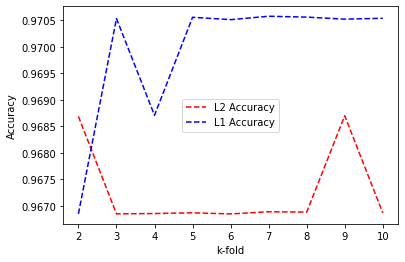

In [ ]:
plt.plot(k_fold,accuracy_scores_l2,'r--', label = "L2 Accuracy")
plt.plot(k_fold,accuracy_scores_l1,'b--', label = "L1 Accuracy")
plt.xlabel('k-fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()